In [1]:
from keras.api import layers, models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Sentiment has 3 classes

In [2]:
model = models.Sequential()

model.add(layers.Input(shape=(300,), name="Domain_1"))

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.5, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.5, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(3, activation='softmax', name="sentiment"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

2025-02-08 23:12:54.177372: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-02-08 23:12:54.177405: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-08 23:12:54.177413: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1739052774.177428 2310351 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739052774.177450 2310351 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,803 (319.54 KB)

 Trainable params: 81,203 (317.20 KB)

 Non-trainable params: 600 (2.34 KB)

In [3]:
df_original = pd.read_csv("../data/processed/processed_tweets.csv")

In [4]:
df_with_unlabeled = df_original.copy()
df_with_unlabeled = df_with_unlabeled[df_with_unlabeled["Sentiment"].isna()]
df_original = df_original.dropna(subset=["Sentiment"])
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          198 non-null    object 
 1   Sentiment     198 non-null    float64
 2   Has opinion   198 non-null    float64
 3   cleaned_text  198 non-null    object 
 4   word_vectors  198 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.3+ KB


In [5]:
df_original.head()

,text,Sentiment,Has opinion,cleaned_text,word_vectors
0,iPad: “Welcome to Apple Intelligence the newes...,-1.0,0.0,ipad welcome apple intelligence new ipad,"[array([-2.04101562e-01, -1.73828125e-01, -2.2..."
1,"I believe they call it ""Apple Intelligence"", Sara",0.0,0.0,believe call apple intelligence sara,"[array([-0.1640625 , 0.01080322, 0.03320312,..."
2,"Unfortunately, there's ""Apple Intelligence"" ad...",-1.0,0.0,unfortunately apple intelligence add software ...,"[array([ 8.39233398e-04, 2.33154297e-02, -1.9..."
3,i did turn it off globally but idk how off it ...,0.0,0.0,turn globally idk truly,"[array([-0.06298828, 0.10693359, -0.00549316,..."
4,"Uh…yeah. Yes, do that, Apple. I’m fine with th...",-1.0,0.0,uhyeah yes apple fine leave intelligence,"[array([ 1.15722656e-01, -1.29882812e-01, 6.5..."


In [6]:
padded_vectors = np.load("../data/processed/padded_vectors.npy")
padded_vectors = padded_vectors[:198]

In [7]:
padded_vectors.shape

(198, 26, 300)

In [8]:
padded_vectors_average = np.mean(padded_vectors, axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_vectors_average, df_original["Sentiment"], test_size=0.2, random_state=1)

In [10]:
X_train.shape

(158, 300)

In [11]:
history = model.fit(x=X_train, y=y_train, epochs=10)

Epoch 1/10


2025-02-08 23:13:00.217444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.1379 - loss: 0.6004
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1385 - loss: 0.4821
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1484 - loss: 0.6058
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2305 - loss: 0.3178
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2070 - loss: 0.3769
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1824 - loss: 0.4300
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2148 - loss: 0.3659
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1622 - loss: 0.3246
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2128 - loss: 0.4006
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2506 - loss: 0.3023


In [12]:
history.history

{'accuracy': [0.14556962251663208,
  0.13291139900684357,
  0.1835443079471588,
  0.22151899337768555,
  0.18987341225147247,
  0.2151898741722107,
  0.2278480976819992,
  0.19620253145694733,
  0.2151898741722107,
  0.2594936788082123],
 'loss': [0.5545329451560974,
  0.5832111835479736,
  0.5104345083236694,
  0.352226197719574,
  0.40395858883857727,
  0.38449475169181824,
  0.34366393089294434,
  0.3597225546836853,
  0.3571707606315613,
  0.2943795621395111]}

In [13]:
model.save("../models/sentiment_classification_model_original.keras")

Text(0.5, 0, 'epoch')

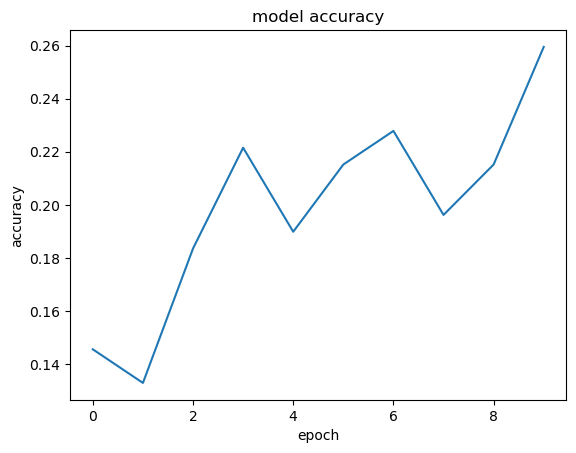

In [14]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

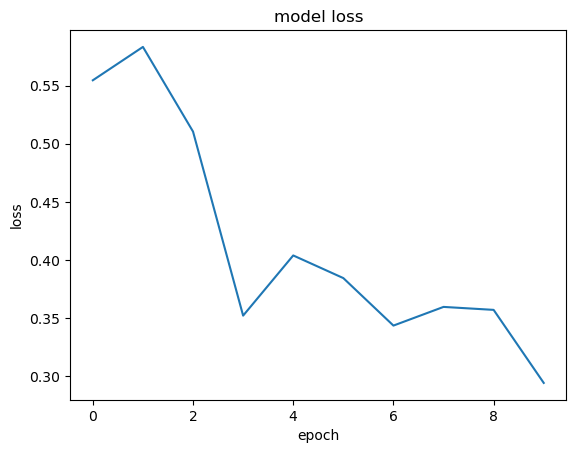

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [16]:
evaluation = model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2875 - loss: 0.2715 


In [17]:
print(f'Loss: {evaluation[0]}, accuracy: {evaluation[1]}')

Loss: 0.2702499032020569, accuracy: 0.2750000059604645


In [18]:
model = models.Sequential()

model.add(layers.Input(shape=(300,), name="Domain_1"))

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.5, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.5, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(3, activation='softmax', name="sentiment"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,803 (319.54 KB)

 Trainable params: 81,203 (317.20 KB)

 Non-trainable params: 600 (2.34 KB)

In [19]:
df_with_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717 entries, 198 to 7914
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7717 non-null   object 
 1   Sentiment     0 non-null      float64
 2   Has opinion   0 non-null      float64
 3   cleaned_text  7712 non-null   object 
 4   word_vectors  7717 non-null   object 
dtypes: float64(2), object(3)
memory usage: 361.7+ KB


In [20]:
unlabeled_padded_vectors = np.load("../data/processed/padded_vectors.npy")[199:]
unlabeled_padded_vectors = unlabeled_padded_vectors.mean(axis=1)
unlabeled_padded_vectors.shape

(7716, 300)

In [21]:
print("Labeled data shape:", padded_vectors_average.shape)  # Expect (198, 300)
print("Unlabeled data shape:", unlabeled_padded_vectors.shape)  # Expect (n, 300)


Labeled data shape: (198, 300)
Unlabeled data shape: (7716, 300)


In [22]:

from scripts.DataDistillation import DataDistillation


distillation = DataDistillation(
    model,
    (padded_vectors_average, df_original["Sentiment"]),
    unlabeled_padded_vectors, epochs=10, pseudo_batch_size=1000, random_state=1, validation_split=0.2
)


In [23]:
distillation.start()

Starting Data Distillation
Training model on labeled training data...
Evaluating model on internal validation set...
Teacher performance on internal validation set: 0.2750000059604645
Starting iteration 1
Pseudo-labeled samples in this iteration: 1000
Training student on combined data with size (1158, 300)
Evaluating model on internal validation set...
Student performance on internal validation set: 0.2750000059604645
Student did not outperform teacher. Stopping data distillation.
Data distillation process completed.
Final teacher performance on internal validation set: 0.2750000059604645
